In [42]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import sys
# %cd ..
sys.path.append(os.path.join(os.getcwd(),'ultralytics/'))

In [2]:
intermediate_features=[]
input_features=[]
def hook(module, input_layer, output_layer):
    print(module)
    input_features.append(input_layer)
    intermediate_features.append(output_layer)
    
def feature_extraction(model, img, layer):
    global intermediate_features, input_features
    intermediate_features=[]
    input_features=[]

    
    hook_val = model.model.model[layer].register_forward_hook(hook)
    print(hook_val)
    
    with torch.no_grad():
        model(img)
    hook_val.remove()
    return intermediate_features[-1],input_features[-1]

def image_preprocessing(image):
    transform= transforms.Compose([
        transforms.Resize((640,640)),
        transforms.ToTensor(),
        transforms.Normalize(mean=0., std=1.)
    ])
    img= Image.open(image)
    img =  transform(img)
    img = img.unsqueeze(0)
    
    return img

In [3]:
import torch
from ultralytics import YOLO
from torchvision import transforms

In [4]:
model=YOLO('Graph/properties/Test_4/weights/best.pt')
model.info(detailed=False)

YOLOv8n-ECA summary: 241 layers, 3011055 parameters, 0 gradients


(241, 3011055, 0, 0.0)

In [43]:
dual_img= 'Temp/VV&VH.png'
single_img= 'Temp/000110.jpg'

In [13]:
imgs=[dual_img, single_img]

In [21]:
import seaborn as sns


ECAAttention(
  (avg_pool): AdaptiveAvgPool2d(output_size=1)
  (conv): Conv1d(1, 1, kernel_size=(3,), stride=(1,), padding=(1,), bias=False)
  (sigmoid): Sigmoid()
)
0: 640x640 3 vessels, 103.1ms
Speed: 0.0ms preprocess, 103.1ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


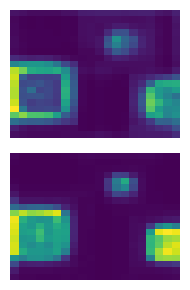

In [37]:
fig = plt.figure(figsize=(2, 3))
layer=25
img=image_preprocessing(imgs[1])
features=feature_extraction(model, img, layer )
for i in range(0,2):
    j=10
    data = features[0][0][i+j].cpu().numpy() 
    ax = fig.add_subplot(2, 1, i+1)  
    sns.heatmap(data, cmap='viridis',cbar=False, annot=False, ax=ax)  
 
    ax.axis('off')  


plt.tight_layout()

plt.savefig(str(layer)+'.png')

plt.show()

In [19]:
features[0].shape

torch.Size([1, 128, 40, 40])

In [45]:
model.predict(source='Ultralytics/Temp/000110.jpg')


image 1/1 /Users/mahfujurrahman/Desktop/Thesis/Ultralytics/Temp/000110.jpg: 640x640 3 vessels, 166.2ms
Speed: 6.9ms preprocess, 166.2ms inference, 15.9ms postprocess per image at shape (1, 3, 640, 640)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'vessel'}
 obb: None
 orig_img: array([[[ 4,  4,  4],
         [ 4,  4,  4],
         [ 4,  4,  4],
         ...,
         [ 5,  5,  5],
         [ 8,  8,  8],
         [ 9,  9,  9]],
 
        [[ 3,  3,  3],
         [ 3,  3,  3],
         [ 3,  3,  3],
         ...,
         [ 5,  5,  5],
         [ 7,  7,  7],
         [ 9,  9,  9]],
 
        [[ 2,  2,  2],
         [ 2,  2,  2],
         [ 2,  2,  2],
         ...,
         [ 4,  4,  4],
         [ 7,  7,  7],
         [ 9,  9,  9]],
 
        ...,
 
        [[13, 13, 13],
         [11, 11, 11],
         [ 8,  8,  8],
         ...,
         [ 4,  4,  4],
         [ 4,  4,  4],
         [ 4,  4,  4]],
 
        [[13, 13, 13],
         [11, 11, 11],
         [ 7,  7,  7],
         ...,
         [ 3,  3,  3],
         [ 4,  4,  4],
         [ 4,  4,  4]],
 
        [[13, 13, 13],
    

In [44]:
pwd

'/Users/mahfujurrahman/Desktop/Thesis'